<a href="https://colab.research.google.com/github/MariaGabrielaAlvesZuppardo/SeriesTemporaisCin/blob/main/ModeloHolt_HoltWinters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install statsmodels scikit-learn numpy pandas matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.holtwinters import Holt

In [ ]:
# Carregando o dataset (usando o famoso conjunto 'Airline Passengers')
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, header=0, parse_dates=[0], index_col=0)
# Removed squeeze=True

# If you need to convert the result into a pandas Series, you can do this:
if df.shape[1] == 1:  # Check if DataFrame has only one column
    df = df.squeeze("columns") # Squeeze the DataFrame to a Series

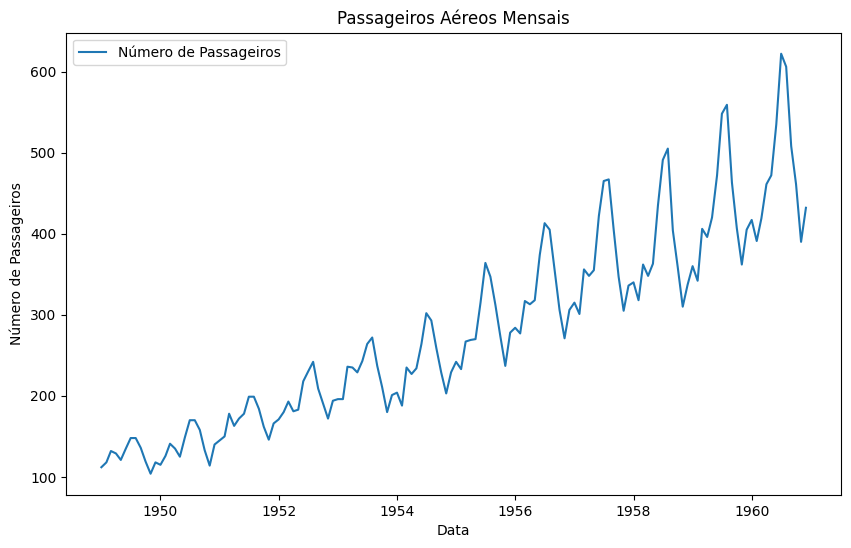

In [ ]:
# Visualizando o conjunto de dados
plt.figure(figsize=(10,6))
plt.plot(df, label='Número de Passageiros')
plt.title('Passageiros Aéreos Mensais')
plt.xlabel('Data')
plt.ylabel('Número de Passageiros')
plt.legend()
plt.show()

In [ ]:
train_size = int(len(df) * 0.7)
train, test = df[0:train_size], df[train_size:]

In [ ]:
# Holt Model (sem sazonalidade)
modelo_holt = Holt(train).fit()
previsao_holt = modelo_holt.forecast(len(test))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
# Holt-Winters (Adição de tendência e sazonalidade)
modelo_hw = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12).fit()
previsao_hw = modelo_hw.forecast(len(test))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
# Holt-Winters Damped (Damping trend)
modelo_hw_damped = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12, damped_trend=True).fit()
previsao_hw_damped = modelo_hw_damped.forecast(len(test))


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


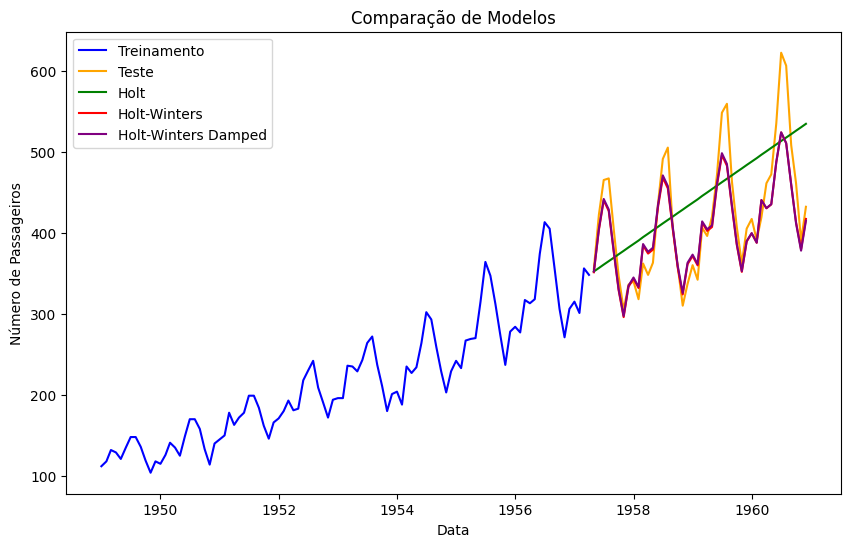

In [ ]:
# Visualizando os resultados
plt.figure(figsize=(10,6))
plt.plot(train, label='Treinamento', color='blue')
plt.plot(test, label='Teste', color='orange')
plt.plot(previsao_holt, label='Holt', color='green')
plt.plot(previsao_hw, label='Holt-Winters', color='red')
plt.plot(previsao_hw_damped, label='Holt-Winters Damped', color='purple')
plt.title('Comparação de Modelos')
plt.xlabel('Data')
plt.ylabel('Número de Passageiros')
plt.legend()
plt.show()

In [ ]:
def calcular_metricas(y_true, y_pred, modelo_nome):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Remover valores inválidos
    mask = (~np.isnan(y_true)) & (~np.isnan(y_pred)) & (y_true != 0)
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    smape = np.mean(2.0 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred))) * 100
    r2 = r2_score(y_true, y_pred)

    # MASE: comparação com o modelo ingênuo (Naive Forecast)
    naive_forecast = y_true[:-1]
    naive_error = np.mean(np.abs(np.diff(y_true)))
    mase = mae / naive_error if naive_error != 0 else np.nan

    print(f"\n📈 Avaliação do Modelo: {modelo_nome}")
    print(f"MAE  : {mae:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"MAPE : {mape:.2f}%")
    print(f"SMAPE: {smape:.2f}%")
    print(f"R²   : {r2:.2f}")
    print(f"MASE : {mase:.2f}")

In [ ]:

# Calculando as métricas para cada modelo
calcular_metricas(test, previsao_holt, 'Holt')
calcular_metricas(test, previsao_hw, 'Holt-Winters')
calcular_metricas(test, previsao_hw_damped, 'Holt-Winters Damped')



📈 Avaliação do Modelo: Holt
MAE  : 64.09
RMSE : 72.44
MAPE : 15.71%
SMAPE: 14.94%
R²   : 0.10
MASE : 1.51

📈 Avaliação do Modelo: Holt-Winters
MAE  : 24.88
RMSE : 33.63
MAPE : 5.40%
SMAPE: 5.57%
R²   : 0.81
MASE : 0.58

📈 Avaliação do Modelo: Holt-Winters Damped
MAE  : 24.66
RMSE : 33.31
MAPE : 5.37%
SMAPE: 5.53%
R²   : 0.81
MASE : 0.58


# Consumo ações apple

In [ ]:
!pip install statsmodels scikit-learn numpy pandas matplotlib

In [ ]:
! pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


Price           Close
Ticker           AAPL
Date                 
2015-01-02  24.320435
2015-01-05  23.635288
2015-01-06  23.637512
2015-01-07  23.968962
2015-01-08  24.889904


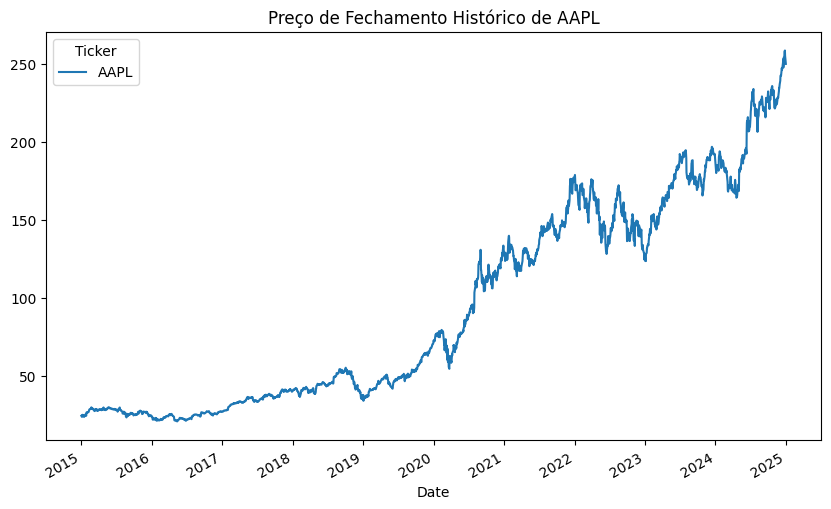

In [ ]:
# Obter dados históricos da ação da Apple (AAPL)
ticker = 'AAPL'
data = yf.download(ticker, start="2015-01-01", end="2025-01-01", progress=False)

# Selecionar a coluna de 'Close' para analisar o preço de fechamento
data = data[['Close']]

# Exibir os dados
print(data.head())

# Plotar os dados históricos
data['Close'].plot(title=f'Preço de Fechamento Histórico de {ticker}', figsize=(10,6))
plt.show()




### Divisão dos dados de treino e teste

In [238]:
# Dividir os dados em treino (70%) e teste (30%)
train_size = int(len(data) * 0.7)
train, test = data[:train_size], data[train_size:]

### Aplicar avaliação dos modelos

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(



Modelo Holt:
Erro Quadrático Médio (MSE): 24930.555349318267
Raiz do Erro Quadrático Médio (RMSE): 157.89412702604955
Erro Absoluto Médio (MAE): 145.02323126271747


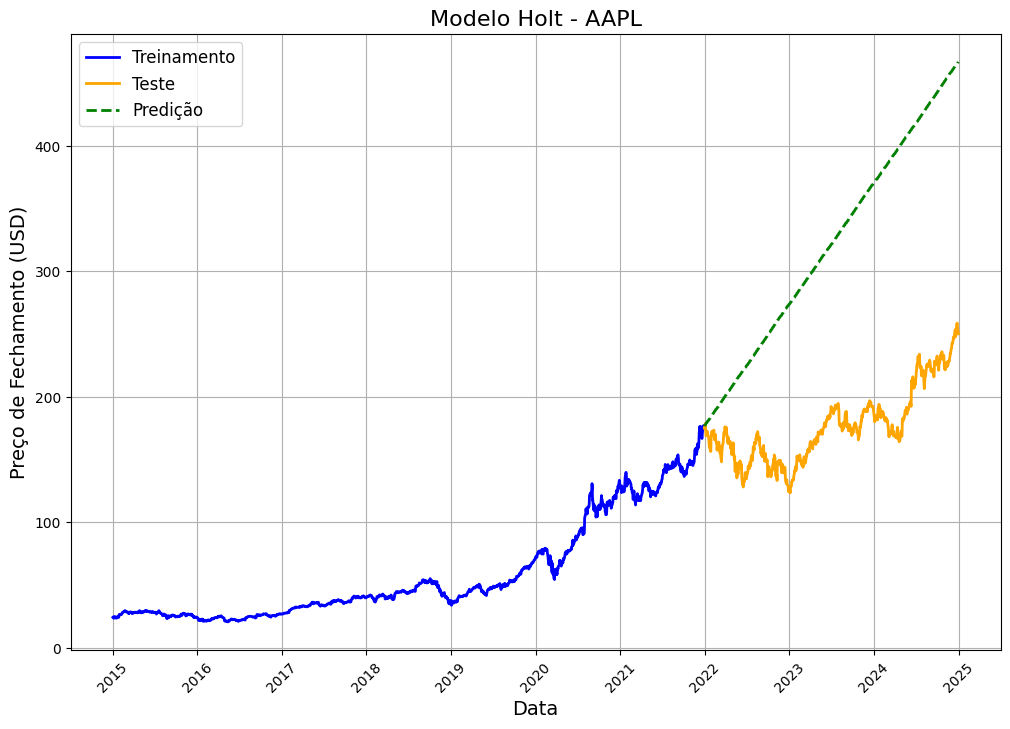

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(



Modelo Holt-Winters:
Erro Quadrático Médio (MSE): 873.5706863894029
Raiz do Erro Quadrático Médio (RMSE): 29.556229231574907
Erro Absoluto Médio (MAE): 23.250446334797463


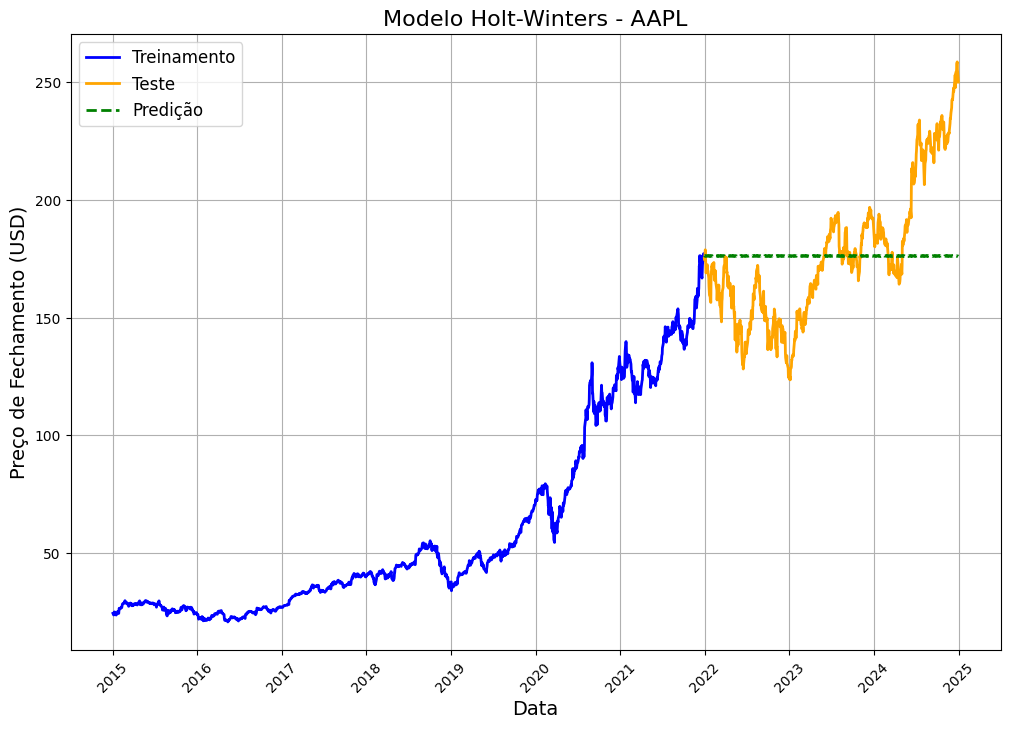

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(



Modelo Holt-Winters Damped:
Erro Quadrático Médio (MSE): 1267.3112962436783
Raiz do Erro Quadrático Médio (RMSE): 35.59931595190669
Erro Absoluto Médio (MAE): 31.48303817274898


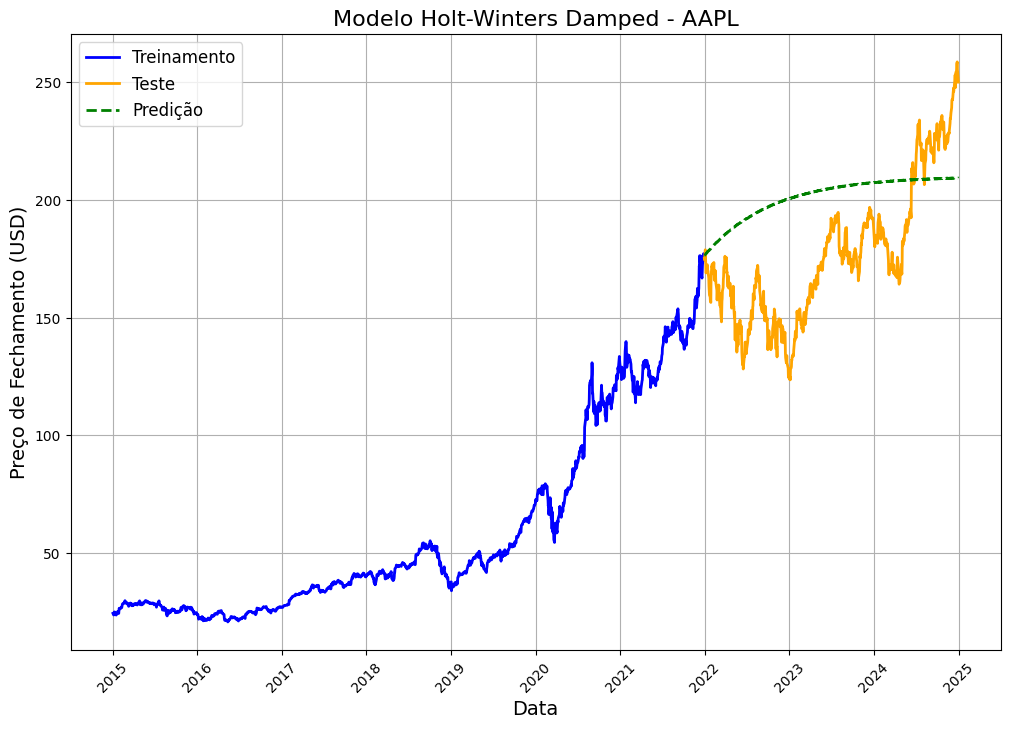

In [239]:
def aplicar_modelo(modelo, nome_modelo, train, test):
    # Ajustar o modelo aos dados de treino
    modelo_fit = modelo.fit()

    # Prever os valores futuros (conjunto de teste)
    pred = modelo_fit.forecast(len(test))

    # Calcular as métricas de erro
    mse = mean_squared_error(test, pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test, pred)

    # Imprimir as métricas de avaliação
    print(f"\n{nome_modelo}:")
    print(f"Erro Quadrático Médio (MSE): {mse}")
    print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse}")
    print(f"Erro Absoluto Médio (MAE): {mae}")

    # Plotar os resultados (depois das métricas)
    plt.figure(figsize=(12,8))
    plt.plot(train.index, train, label="Treinamento", color='blue', linewidth=2)
    plt.plot(test.index, test, label="Teste", color='orange', linewidth=2)
    plt.plot(test.index, pred, label="Predição", color='green', linewidth=2, linestyle='--')

    # Melhorias na legibilidade
    plt.title(f'{nome_modelo} - {ticker}', fontsize=16)
    plt.xlabel('Data', fontsize=14)
    plt.ylabel('Preço de Fechamento (USD)', fontsize=14)
    plt.legend(loc='upper left', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Holt Model (Linear Trend)
holt_model = Holt(train['Close'])
aplicar_modelo(holt_model, "Modelo Holt", train, test)

# Holt-Winters (Componente Sazonal)
holt_winters_model = ExponentialSmoothing(train['Close'], seasonal='add', seasonal_periods=12)
aplicar_modelo(holt_winters_model, "Modelo Holt-Winters", train, test)

# Holt-Winters Damped
damped_model = ExponentialSmoothing(train['Close'], trend='add', seasonal='add', damped_trend=True, seasonal_periods=12)
aplicar_modelo(damped_model, "Modelo Holt-Winters Damped", train, test)